### Análisis exploratorio de los datos.

In [3]:
library(ggplot2)
library(ggpubr)
library(naniar)

In [4]:
df <- read.csv('data/Data_Cortex_Nuclear.csv')
proteinas <- colnames(df[, 2:78])
df <- df[, c('MouseID', 'Genotype', 'Treatment', 'Behavior', 'class', proteinas)]
df$Genotype <- ifelse(df$Genotype == 'Control', 'c', 't')
df$Treatment <- ifelse(df$Treatment == 'Memantine', 'm', 's')
df$Behavior <- as.factor(gsub('/', '', df$Behavior))
df$class <- paste0(df$Genotype, df$Behavior, df$Treatment)
df$Genotype <- as.factor(df$Genotype)
df$Treatment <- as.factor(df$Treatment)
df$Behavior <- as.factor(df$Behavior)
df$class <- as.factor(df$class)
head(df)

,MouseID,Genotype,Treatment,Behavior,class,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,⋯,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,309_1,c,m,CS,cCSm,0.5036439,0.7471932,0.4301753,2.816329,5.990152,⋯,0.1888517,0.1226520,NA,0.1063052,0.1083359,0.4270992,0.1147832,0.1317900,0.1281856,1.675652
2,309_2,c,m,CS,cCSm,0.5146171,0.6890635,0.4117703,2.789514,5.685038,⋯,0.2004036,0.1166822,NA,0.1065922,0.1043154,0.4415813,0.1119735,0.1351030,0.1311187,1.743610
3,309_3,c,m,CS,cCSm,0.5091831,0.7302468,0.4183088,2.687201,5.622059,⋯,0.1936845,0.1185082,NA,0.1083031,0.1062193,0.4357769,0.1118829,0.1333618,0.1274311,1.926427
4,309_4,c,m,CS,cCSm,0.4421067,0.6170762,0.3586263,2.466947,4.979503,⋯,0.1921119,0.1327812,NA,0.1031838,0.1112620,0.3916910,0.1304053,0.1474442,0.1469011,1.700563
5,309_5,c,m,CS,cCSm,0.4349402,0.6174298,0.3588022,2.365785,4.718679,⋯,0.2056042,0.1299541,NA,0.1047838,0.1106939,0.4341538,0.1184814,0.1403143,0.1483799,1.839730
6,309_6,c,m,CS,cCSm,0.4475064,0.6281758,0.3673881,2.385939,4.807635,⋯,0.1904695,0.1315752,NA,0.1064762,0.1094457,0.4398331,0.1166572,0.1407664,0.1421804,1.816389


In [27]:
### Eliminar proteinas con % alto de NA
#df <- df[, !colnames(df) %in% c('BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N')]
df <- df[complete.cases(df), ]

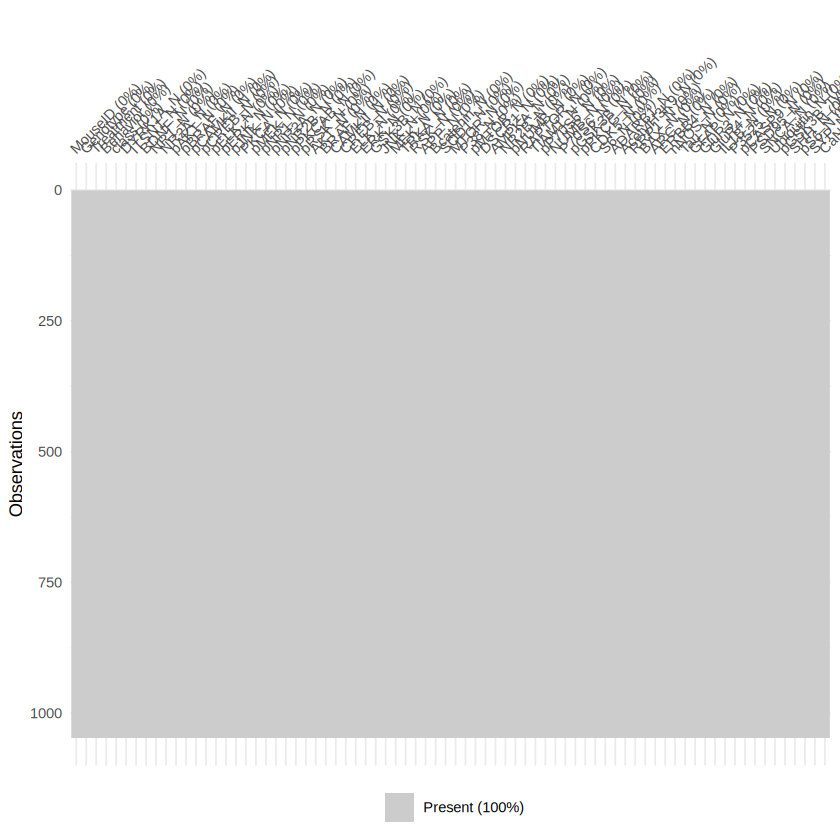

In [28]:
vis_miss(df)

In [29]:
createViolinPlot <- function(variable, clase){
    p1 <- ggplot(df, aes_string(x = clase, y = variable, fill = clase)) + 
            geom_violin() +
            theme_bw() +
            theme(axis.title.x = element_blank()) +
            coord_flip()
    p1
}

In [30]:
createDensityPlot <- function(variable, clase){
    p1 <- ggplot(df, aes_string(x = variable)) + 
            geom_density(aes_string(colour = clase)) +
            theme_bw()
    p1
}


In [31]:
createFig <- function(variable, clase){
    ggarrange(createViolinPlot(variable, clase), 
              createDensityPlot(variable, clase), 
              nrow = 2, ncol = 1, common.legend  = TRUE, legend = 'top', align = 'hv')
}

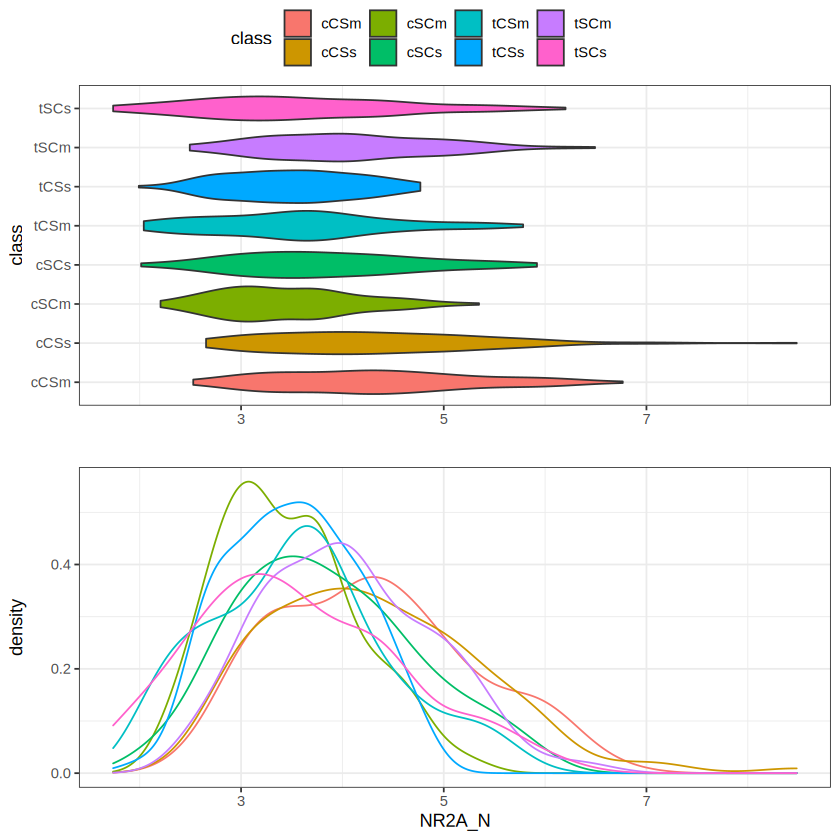

In [32]:
createFig('NR2A_N', 'class')

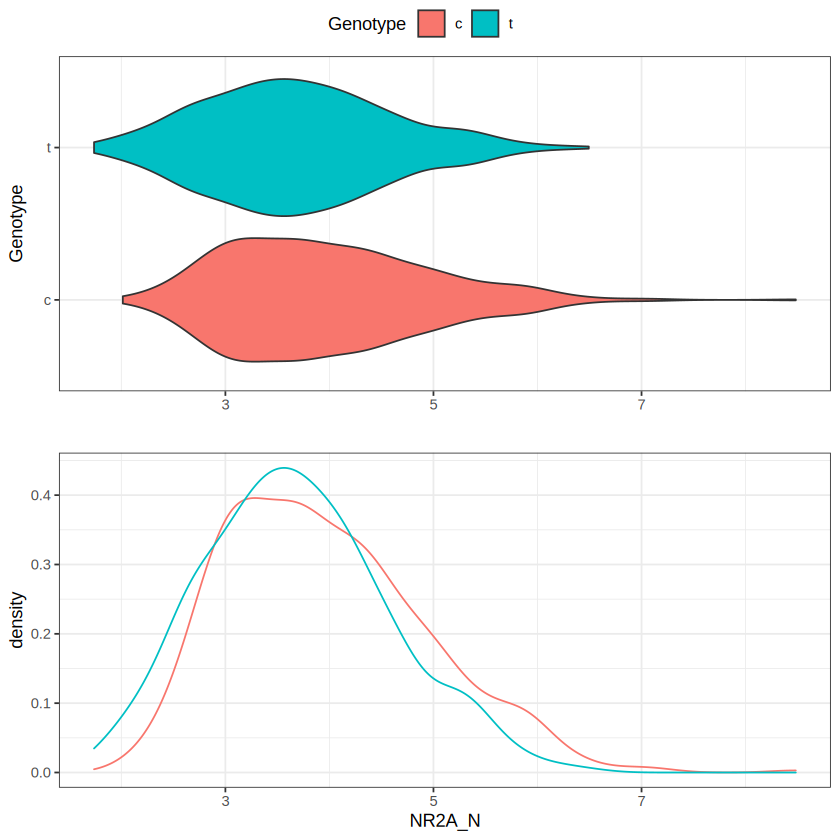

In [33]:
createFig('NR2A_N', 'Genotype')

In [34]:
save.image()

In [35]:
head(df)

,MouseID,Genotype,Treatment,Behavior,class,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,⋯,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,309_1,c,m,CS,cCSm,0.5036439,0.7471932,0.4301753,2.816329,5.990152,⋯,0.2475378,1.603310,2.014875,0.1082343,1.0449792,0.8315565,0.1888517,0.1063052,0.4270992,1.675652
2,309_2,c,m,CS,cCSm,0.5146171,0.6890635,0.4117703,2.789514,5.685038,⋯,0.2576322,1.671738,2.004605,0.1097485,1.0098831,0.8492704,0.2004036,0.1065922,0.4415813,1.743610
3,309_3,c,m,CS,cCSm,0.5091831,0.7302468,0.4183088,2.687201,5.622059,⋯,0.2553430,1.663550,2.016831,0.1081962,0.9968476,0.8467087,0.1936845,0.1083031,0.4357769,1.926427
4,309_4,c,m,CS,cCSm,0.4421067,0.6170762,0.3586263,2.466947,4.979503,⋯,0.2511031,1.484624,1.957233,0.1198832,0.9902247,0.8332768,0.1921119,0.1031838,0.3916910,1.700563
5,309_5,c,m,CS,cCSm,0.4349402,0.6174298,0.3588022,2.365785,4.718679,⋯,0.2517730,1.534835,2.009109,0.1195244,0.9977750,0.8786678,0.2056042,0.1047838,0.4341538,1.839730
6,309_6,c,m,CS,cCSm,0.4475064,0.6281758,0.3673881,2.385939,4.807635,⋯,0.2444853,1.507777,2.003535,0.1206872,0.9201782,0.8436793,0.1904695,0.1064762,0.4398331,1.816389
